In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image

In [ ]:
#DATA PRE PROCESSING
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image

image_directory = '/content/drive/MyDrive/Colab Notebooks/DATA_NEW/'
SIZE = 240
dataset = []    
label = [] 

In [ ]:
normal_images = os.listdir(image_directory + 'NORMAL/')
for i, image_name in enumerate(normal_images):   
  
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'NORMAL/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
covid_images = os.listdir(image_directory + 'COVID-19/')
for i, image_name in enumerate(covid_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'COVID-19/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.30, random_state = 0)


In [ ]:
from tensorflow.keras.utils import normalize
X_train = normalize(X_train,axis=1)
X_test = normalize(X_test,axis=1)

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  

In [ ]:
#EfficientNet Implementation

from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB3

inputs = layers.Input(shape=(SIZE,SIZE,3))

NUM_CLASSES = 2
SIZE = 300
size = (SIZE, SIZE)
# Using model without transfer learning

outputs = EfficientNetB3(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             
              metrics=['accuracy'])

print(model.summary())    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 238, 238, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 119, 119, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 117, 117, 32)      9248      
                                                                 
 activation_11 (Activation)  (None, 117, 117, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                  

In [ ]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


Epoch 1/10
3/3 [==============================] - 1s 164ms/step - loss: 1.9732 - accuracy: 0.5000 - val_loss: 0.7196 - val_accuracy: 0.4833
Epoch 2/10
3/3 [==============================] - 0s 60ms/step - loss: 0.6736 - accuracy: 0.5714 - val_loss: 0.6992 - val_accuracy: 0.4833
Epoch 3/10
3/3 [==============================] - 0s 60ms/step - loss: 0.5970 - accuracy: 0.6929 - val_loss: 0.4135 - val_accuracy: 0.9167
Epoch 4/10
3/3 [==============================] - 0s 61ms/step - loss: 0.2877 - accuracy: 0.9000 - val_loss: 0.4596 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 0s 62ms/step - loss: 0.7089 - accuracy: 0.7286 - val_loss: 0.2779 - val_accuracy: 0.9167
Epoch 6/10
3/3 [==============================] - 0s 61ms/step - loss: 0.2163 - accuracy: 0.9429 - val_loss: 0.1955 - val_accuracy: 0.9167
Epoch 7/10
3/3 [==============================] - 0s 60ms/step - loss: 0.1976 - accuracy: 0.9429 - val_loss: 0.1984 - val_accuracy: 0.9333
Epoch 8/10
3/3 [==========

In [ ]:
model.save('covid_model_10epochs.h5')

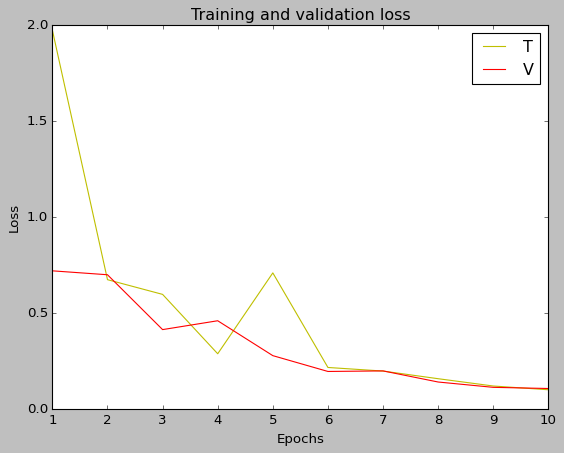

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='T')
plt.plot(epochs, val_loss, 'r', label='V')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

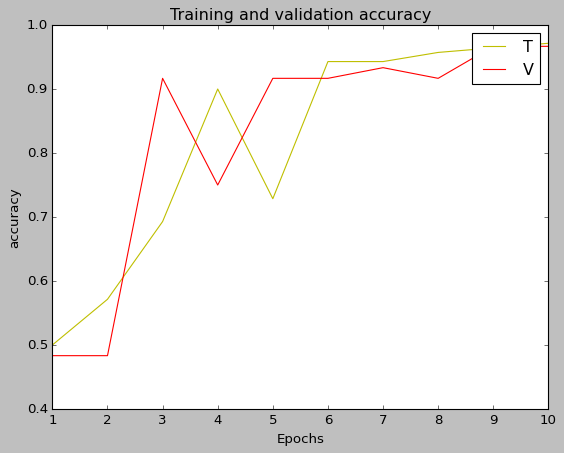

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='T')
plt.plot(epochs, val_accuracy, 'r', label='V')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
# load model
model = load_model('covid_model_10epochs.h5')

In [ ]:
acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc[1] * 100), "%")


2/2 [==============================] - 0s 15ms/step - loss: 0.1067 - accuracy: 0.9667
Accuracy =  96.66666388511658 %


In [ ]:
mythreshold=0.3
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[28  1]
 [ 0 31]]


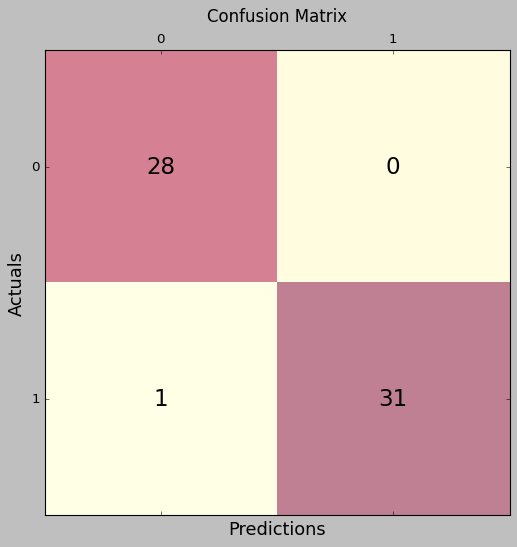

In [ ]:
mat_con=(confusion_matrix(y_test,y_pred))
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
y_pred

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
y_test

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_pred, y_test)

0.9665924276169265

In [ ]:
image=Image.open('/content/drive/MyDrive/Colab Notebooks/DATA_NEW/COVID-19/COVID19(1).jpg').convert('RGB')
plt.imshow(image)
n=1#Select the index of image to be loaded for testing
img = X_test[n]

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [ ]:
if(y_test[n]==1):
    print("COVID-19")
else:
    print("NORMAL")